##Import dataset

In [207]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Import libraries

In [208]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [214]:
!pip install Pillow

from PIL import Image
import os

def convert_to_jpg(image_path):
  try:
    img = Image.open(image_path)
    img = img.convert('RGB')  # Ensure the image is in RGB format
    img.save(image_path, 'JPG')  # Overwrite the original file with the JPEG version
  except IOError:
    print(f"Could not convert {image_path}")

# Loop through your training and validation dataset directories
# and convert all images to JPEG format
for dataset_dir in ['/content/drive/MyDrive/gym_equipment_recognition/training', '/content/drive/MyDrive/gym_equipment_recognition/validation']:
  for filename in os.listdir(dataset_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')): # Check for image files
        image_path = os.path.join(dataset_dir, filename)
        convert_to_jpg(image_path)

In [215]:
import tensorflow as tf

def load_image(image_path):
    try:
        image_raw = tf.io.read_file(image_path)
        image = tf.image.decode_jpg(image_raw)  # Or decode_png, decode_gif, etc.
        # ... further image preprocessing ...
        return image
    except tf.errors.InvalidArgumentError as e:
        print(f"Error decoding image {image_path}: {e}")
        return None  # Or handle the error differently

##Data preprocessing

#Training image preprocessing

In [216]:
#training image preprocessing
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/gym_equipment_recognition/training',
    labels = 'inferred', #labels are generated from directory
    label_mode = 'categorical', #we have more than 2 classes
    class_names = None,
    color_mode = 'rgb',
    batch_size=32,
    image_size=(64, 64), #focus on important features
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 439 files belonging to 10 classes.


#Validation image preprocessing

In [217]:
#validation image processing
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/gym_equipment_recognition/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 59 files belonging to 10 classes.


##Building Model

In [218]:
cnn = tf.keras.models.Sequential()

##Building Convulation Layers

In [219]:
#building convulation layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25)) #to avoid overfitting

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Dropout(0.25)) #to avoid overfitting

In [220]:
cnn.add(tf.keras.layers.Flatten())

In [221]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5)) #to avoid overfitting

In [227]:
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax')) #output layers

##Compiling and training phase

In [223]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [228]:
cnn.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)                   │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 62, 62, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 31, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 4)                   │           1,028 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,621,014 (25.26 MB)

 Trainable params: 6,621,014 (25.26 MB)

 Non-trainable params: 0 (0.00 B)

In [233]:
import tensorflow as tf

def preprocess_image(image_path):
    """
    Loads an image from the given path, decodes it, and ensures it's in the correct format.

    Args:
        image_path: The path to the image file.

    Returns:
        A preprocessed image tensor.
    """
    # Load the image file
    image_raw = tf.io.read_file(image_path)

    # Attempt to decode the image as PNG, JPEG, or GIF
    # If it fails to decode, assume it is BMP
    try:
        image = tf.image.decode_png(image_raw)
    except tf.errors.InvalidArgumentError:
        try:
            image = tf.image.decode_jpeg(image_raw)
        except tf.errors.InvalidArgumentError:
            try:
                image = tf.image.decode_gif(image_raw)
            except tf.errors.InvalidArgumentError:
                image = tf.image.decode_bmp(image_raw)

    # Ensure the image has 3 channels (RGB)
    # Some image formats like grayscale may only have 1 channel.
    # This check will try and convert those to 3 channels
    if image.shape[-1] == 1:
        image = tf.image.grayscale_to_rgb(image)
    elif image.shape[-1] == 4:
        # If the image has an alpha channel and we try and load it using
        # tf.image.decode_jpeg, it will fail, so here we force those to PNG instead
        image = tf.image.decode_png(image_raw)
        if image.shape[-1] == 4:
            image = image[:,:,:3]

    return image

# Assuming your image_paths are stored in training_image_paths and validation_image_paths
training_set = [preprocess_image(image_path) for image_path in training_image_paths]
validation_set = [preprocess_image(image_path) for image_path in validation_image_paths]

# Convert to Datasets for better performance if needed
training_set = tf.data.Dataset.from_tensor_slices(training_set)
validation_set = tf.data.Dataset.from_tensor_slices(validation_set)

training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=5)

ValueError: Attempt to convert a value (PosixPath('/content/drive/MyDrive/gym_equipment_recognition/training/Recumbent Bike/OIP.6HehrNTTJoAApTU_civxfwHaHa.jpg')) with an unsupported type (<class 'pathlib.PosixPath'>) to a Tensor.

##Evaluating Model

In [ ]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

      3/Unknown 2s 687ms/step - accuracy: 0.4062 - loss: 1.3595

InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_one_step_on_iterator_22111]

In [ ]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 542ms/step - accuracy: 0.2539 - loss: 1.4371
Validation accuracy: 0.25


##Saving model

In [ ]:
cnn.save('trained_model.h5')

In [ ]:
#recording history
import json
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


##Calculating accuracy of model achieved on validation set

In [ ]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 25.0 %


##Accuracy visualisation

#Training visualisation

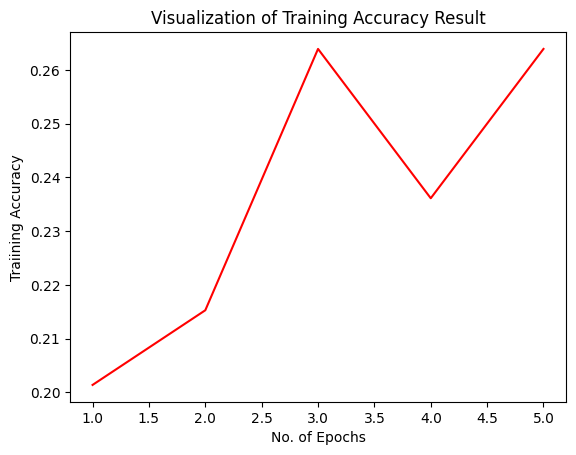

In [ ]:
#training visualisation
# Get the actual number of epochs from the training history
num_epochs = len(training_history.history['accuracy'])
epochs = [i for i in range(1, num_epochs + 1)]  # Adjust epochs based on training history
plt.plot(epochs, training_history.history['accuracy'], color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

#Validation accuracy

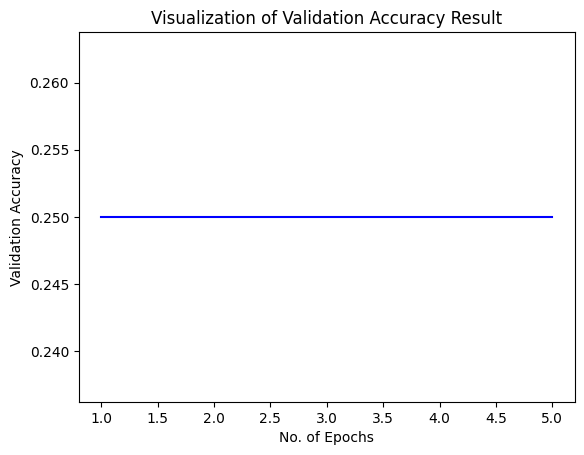

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

##Test set evaluation

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/gym_equipment_recognition/testing',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 72 files belonging to 4 classes.


In [ ]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.2305 - loss: 1.4541
Test accuracy: 0.25


##Testing model

In [ ]:
import numpy as np
import tensorflow as tf
# ImageDataGenerator has been moved to tf.keras.utils.image_dataset_from_directory
# and is now accessed using tf.keras.preprocessing.image.ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/gym_equipment_recognition/testing',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 72 files belonging to 4 classes.


In [ ]:
cnn = tf.keras.models.load_model('/content/trained_model.h5')

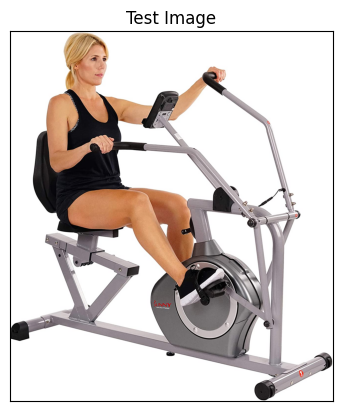

In [ ]:
#Test Image Visualization
import cv2
image_path = '/content/drive/MyDrive/gym_equipment_recognition/testing/Recumbent Bike/4-219.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [ ]:
print(predictions)

[[0.26839176 0.3710429  0.13360739 0.2269579 ]]


In [ ]:
test_set.class_names

['Dumbells', 'Elliptical Machine', 'Home Machine', 'Recumbent Bike']

In [ ]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

1


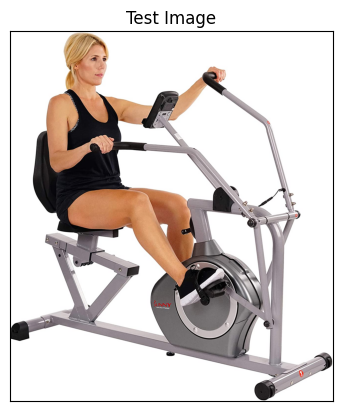

In [ ]:
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))

It's a Elliptical Machine


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 359 images belonging to 10 classes.
Found 80 images belonging to 10 classes.
Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 72s 7s/step - accuracy: 0.0958 - loss: 2.3775 - val_accuracy: 0.1875 - val_loss: 2.0756
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.0938 - loss: 2.2476 - val_accuracy: 0.3125 - val_loss: 2.0931
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.4180 - loss: 1.8119 - val_accuracy: 0.5469 - val_loss: 1.1380
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - accuracy: 0.5312 - loss: 1.4376 - val_accuracy: 0.4375 - val_loss: 1.5809
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.5495 - loss: 1.3717 - val_accuracy: 0.5781 - val_loss: 1.1450
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5625 - loss: 1.2009 - val_accuracy: 0.5625 - val_loss: 1.2471
Epoch 7/10
11/11 ━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Predicted class: punching-bag


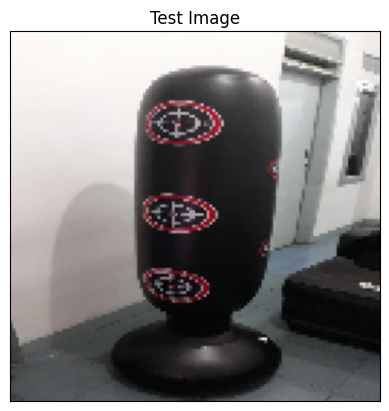

In [242]:
!pip install tensorflow
!pip install matplotlib

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set the path to your dataset on Google Drive (training folder)
dataset_path = '/content/drive/MyDrive/gym_equipment_recognition/training'

# Define parameters for image loading and preprocessing
img_height, img_width = 128, 128
batch_size = 32

# Create data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Build the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

# Test the model with the provided image path
from tensorflow.keras.preprocessing import image

img_path = '/content/drive/MyDrive/gym_equipment_recognition/training/punching-bag/1.jpg'
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.

prediction = model.predict(img_array)
predicted_class_index = np.argmax(prediction)

# Get class labels from the directory structure (sorted)
class_labels = sorted(os.listdir(dataset_path))

print("Predicted class:", class_labels[predicted_class_index])

plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()